In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir='C:/Users/kaler/OneDrive/Desktop/BE/DL/Practicles/mnist-jpg/mnist-jpg/train'
test_dir='C:/Users/kaler/OneDrive/Desktop/BE/DL/Practicles/mnist-jpg/mnist-jpg/test'

In [3]:
data_generator= ImageDataGenerator(rescale=(1.0/255))

In [4]:
train_data_generator=data_generator.flow_from_directory(
    train_dir,
    target_size=(28,28),
    batch_size=50000,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.


In [5]:
test_data_generator=data_generator.flow_from_directory(
    test_dir,
    target_size=(28,28),
    batch_size=1000,
    class_mode='categorical',
    color_mode ='grayscale',
    shuffle=True,
)

Found 10000 images belonging to 10 classes.


In [18]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [19]:
model.compile(optimizer ='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train , validation_data=(x_test,y_test) , epochs=10, batch_size=10, shuffle=True)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7865 - loss: 0.7477 - val_accuracy: 0.9150 - val_loss: 0.2834
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9295 - loss: 0.2439 - val_accuracy: 0.9320 - val_loss: 0.2184
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9461 - loss: 0.1866 - val_accuracy: 0.9420 - val_loss: 0.1993
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9553 - loss: 0.1474 - val_accuracy: 0.9460 - val_loss: 0.1750
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9634 - loss: 0.1259 - val_accuracy: 0.9540 - val_loss: 0.1464
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9686 - loss: 0.1060 - val_accuracy: 0.9560 - val_loss: 0.1370
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9724 - loss: 0.0905 - val_accuracy: 0.9600 - val_loss: 0.1342
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9762 - loss: 0

In [27]:
test_loss, test_acc= model.evaluate(x_test,y_test)
print("loss ",test_loss)
print("accuracy",test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.1220
loss  0.11047271639108658
accuracy 0.9639999866485596


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Actual Value:  6
Predicted Value:  6


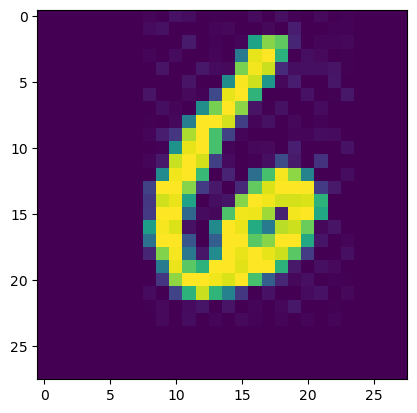

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
n=15
plt.imshow(x_test[n])
predicted_value=model.predict(x_test)
print("Actual Value: ",np.argmax(y_test[n]))
print("Predicted Value: ",np.argmax(predicted_value[n]))

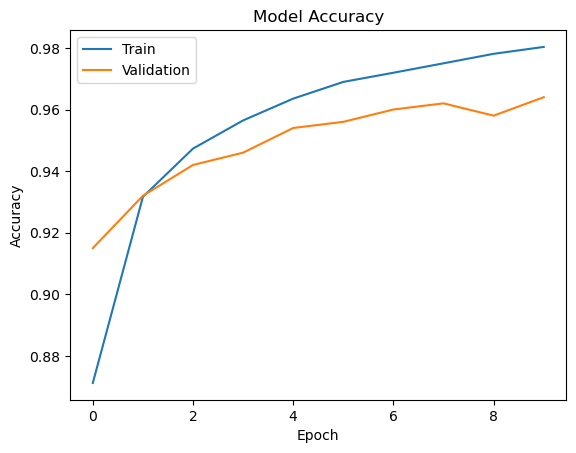

In [34]:
# Plot The Training LOSS And Accuracy
# Plotting The Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

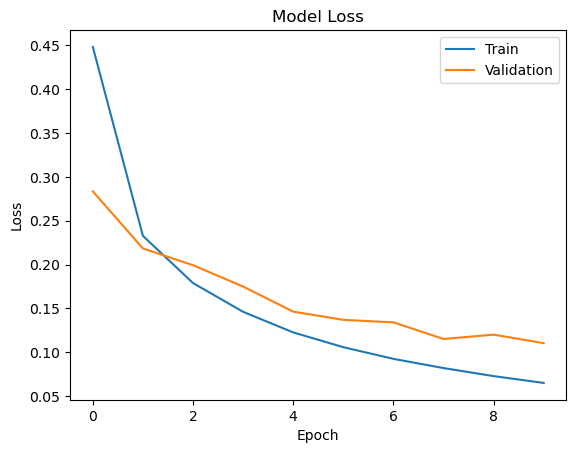

In [35]:
#Plotting The Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()